# Day 16 - Solve the problems and interpreting output
9 April 2022, 01:29 PM

Deskripsi Project

 What to submit? Google colab link (don’t forget to share
access to me: pararawendy19@gmail.com)
Format notebook name: HW_REGRESSION_"YOURCOMPLETENAME" 

 

●  For the assignment, we will use the following data
○ dibimbing-materials/boston.csv at main · pararawendy/dibimbing-materials · GitHub
Instructions:
1. Split data: train - validate - test (point: 10)
2. Draw correlation plot on training data and perform feature selection on
highly correlated features (point: 10)
3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)
a. Ridge regression (point: 25)
b. LASSO (point: 25)
4. Choose the best lambda from the validation set (point: 20)
a. Use RMSE as metric
b. Interpret a sample of the coefficients of the best model
i. Ridge regression
ii. LASSO
5. Evaluate the best models on the test data (+ interpretation) (point: 10)
a. MAE
b. MAPE
c. RMSE 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
house = pd.read_csv('boston.csv')
house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 1. Split data: train - validate - test (point: 10)

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = house.drop(columns='medv')
target = house[['medv']]

feature_house_pretrain, feature_house_test, target_house_pretrain, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_house_train, feature_house_validation, target_house_train, target_house_validation = train_test_split(feature_house_pretrain, target_house_pretrain, test_size=0.20, random_state=42)

## 2. Draw correlation plot on training data and perform feature selection on
highly correlated features (point: 10)

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = house.drop(columns='medv')
target = house[['medv']]

feature_house_train, feature_house_test, target_house_train, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with high VIF scores:
1. `rad`
2. `tax`

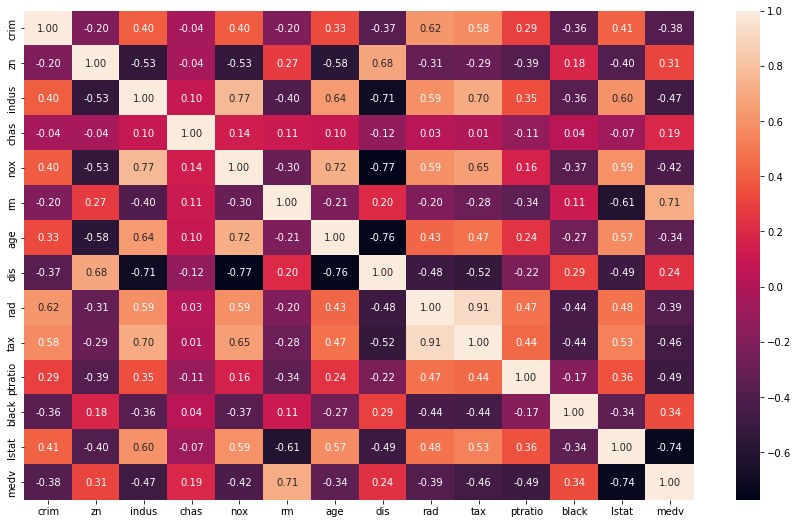

In [ ]:
# heatmap correlation
house_train = pd.concat([feature_house_train, target_house_train], axis=1)
corr = house_train.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

we need to drop:
* `rad`
* `tax`

In [ ]:
feature_house_train = feature_house_train.drop(columns=['tax','rad']) 
feature_house_test = feature_house_test.drop(columns=['tax','rad'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_house_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.411910
2,zn,2.233054
3,indus,3.229591
4,chas,1.083338
5,nox,3.988711
6,rm,1.866058
7,age,2.951810
8,dis,4.159840
9,ptratio,1.492126
10,black,1.288546


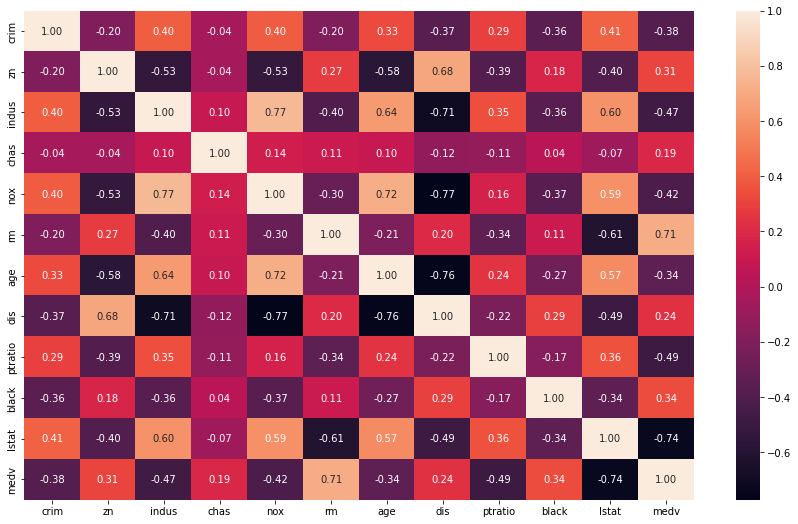

In [ ]:
house_train = pd.concat([feature_house_train, target_house_train], axis=1)
corr = house_train.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()

multi_reg.fit(X_house_train, y_house_train)

LinearRegression()

In [ ]:
data = feature_house_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,23.859235
1,crim,-0.077127
2,zn,0.023704
3,indus,-0.006637
4,chas,3.117319
5,nox,-15.061877
6,rm,4.743664
7,age,-0.010096
8,dis,-1.431755
9,ptratio,-0.794228


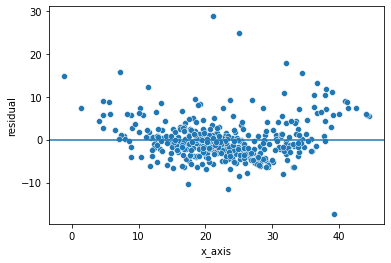

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_house_train)
residual = y_house_train - y_predict_train

#preprocess shape
y_predict_train = np.array([value for nested_array in y_predict_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()


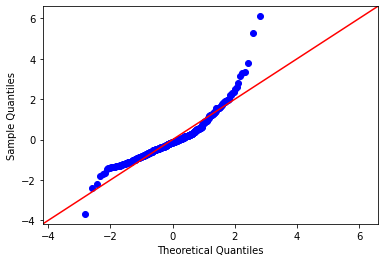

In [ ]:
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

## 3. Fit models on training data (lambdas = [0.01, 0.1, 1, 10]) (point:50)

In [ ]:
#split train test
from sklearn.model_selection import train_test_split

feature = house.drop(columns='medv')
target = house[['medv']]

feature_house_pretrain, feature_house_test, target_house_pretrain, target_house_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_house_train, feature_house_validation, target_house_train, target_house_validation = train_test_split(feature_house_pretrain, target_house_pretrain, test_size=0.20, random_state=42)

In [ ]:
# Drop Multicollinear Features
feature_house_train = feature_house_train.drop(columns=['tax','rad']) 
feature_house_test = feature_house_test.drop(columns=['tax','rad'])
feature_house_validation = feature_house_validation.drop(columns=['tax','rad'])

a. Ridge regression (point: 25)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_house_train, y_house_train)
ridge_reg_pointone.fit(X_house_train, y_house_train)
ridge_reg_one.fit(X_house_train, y_house_train)
ridge_reg_ten.fit(X_house_train, y_house_train)

Ridge(alpha=10, random_state=42)

In [ ]:
model = ridge_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,22.415564
1,crim,-0.073157
2,zn,0.026909
3,indus,-0.000813
4,chas,3.288124
5,nox,-17.308840
6,rm,5.180654
7,age,-0.005276
8,dis,-1.509390
9,ptratio,-0.847288


In [ ]:
model = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,21.518520
1,crim,-0.073923
2,zn,0.027031
3,indus,-0.007849
4,chas,3.235982
5,nox,-15.999321
6,rm,5.181515
7,age,-0.006137
8,dis,-1.485845
9,ptratio,-0.835760


In [ ]:
model = ridge_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,16.968790
1,crim,-0.077943
2,zn,0.027766
3,indus,-0.044982
4,chas,2.912564
5,nox,-9.092506
6,rm,5.163755
7,age,-0.010433
8,dis,-1.362330
9,ptratio,-0.776235


In [ ]:
model = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.150035
1,crim,-0.081692
2,zn,0.030016
3,indus,-0.086739
4,chas,1.946433
5,nox,-1.668543
6,rm,4.759384
7,age,-0.010993
8,dis,-1.236508
9,ptratio,-0.731620


b. LASSO (point: 25)

In [ ]:
from sklearn.linear_model import Lasso

# define the model lasso
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model lasso (training)
lasso_reg_pointzeroone.fit(X_house_train, y_house_train)
lasso_reg_pointone.fit(X_house_train, y_house_train)
lasso_reg_one.fit(X_house_train, y_house_train)
lasso_reg_ten.fit(X_house_train, y_house_train)

Lasso(alpha=10, random_state=42)

In [ ]:
model = lasso_reg_pointzeroone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,20.490399
1,crim,-0.074769
2,zn,0.027116
3,indus,-0.014924
4,chas,3.053400
5,nox,-14.396184
6,rm,5.167917
7,age,-0.006737
8,dis,-1.451114
9,ptratio,-0.822504


In [ ]:
model = lasso_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,11.642865
1,crim,-0.082375
2,zn,0.028087
3,indus,-0.078361
4,chas,1.276505
5,nox,-0.000000
6,rm,4.999533
7,age,-0.011609
8,dis,-1.140990
9,ptratio,-0.706439


In [ ]:
model = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.859306
1,crim,-0.056676
2,zn,0.020648
3,indus,-0.028455
4,chas,0.000000
5,nox,-0.000000
6,rm,2.465867
7,age,0.022761
8,dis,-0.557911
9,ptratio,-0.717385


In [ ]:
model = lasso_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,26.087253
1,crim,-0.000000
2,zn,0.008032
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,0.000000
7,age,0.000382
8,dis,-0.000000
9,ptratio,-0.000000


## 4. Choose the best lambda from the validation set (point: 20) a. Use RMSE as metric b. Interpret a sample of the coefficients of the best model i. Ridge regression ii. LASSO

###i. Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_house_train = feature_house_train.to_numpy()
y_house_train = target_house_train.to_numpy()
y_house_train = y_house_train.reshape(len(y_house_train),)

# define the model Ridge
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model Ridge (training)
ridge_reg_pointzeroone.fit(X_house_train, y_house_train)
ridge_reg_pointone.fit(X_house_train, y_house_train)
ridge_reg_one.fit(X_house_train, y_house_train)
ridge_reg_ten.fit(X_house_train, y_house_train)

Ridge(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.962234082671707
RMSE of Ridge regression model with alpha = 0.1 is 4.950661805765886
RMSE of Ridge regression model with alpha = 1.0 is 4.909045042614708
RMSE of Ridge regression model with alpha = 10 is 4.867167076950583


hasil pada model ridge regretion di temukan bahwa lamda dengan nilai 10 memiliki hasil paling kecil dari yang lain dan nilai ini menjadi model evaluasi pada lamda terbaik

model evaluation

In [ ]:
ridge_best = ridge_reg_ten


coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.150035
1,crim,-0.081692
2,zn,0.030016
3,indus,-0.086739
4,chas,1.946433
5,nox,-1.668543
6,rm,4.759384
7,age,-0.010993
8,dis,-1.236508
9,ptratio,-0.731620


### ii. Lasso

In [ ]:
from sklearn.linear_model import Lasso
# define the model lasso
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model lasso (training)
lasso_reg_pointzeroone.fit(X_house_train, y_house_train)
lasso_reg_pointone.fit(X_house_train, y_house_train)
lasso_reg_one.fit(X_house_train, y_house_train)
lasso_reg_ten.fit(X_house_train, y_house_train)

Lasso(alpha=10, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

X_house_validation = feature_house_validation.to_numpy()
y_house_validation = target_house_validation.to_numpy()
y_house_validation = y_house_validation.reshape(len(y_house_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_house_validation)
    rmse = np.sqrt(mean_squared_error(y_house_validation,y_predict_validation))
    print(f'RMSE of Lasso model with alpha = {alpha} is {rmse}')

RMSE of Lasso model with alpha = 0.01 is 4.934493563284168
RMSE of Lasso model with alpha = 0.1 is 4.904075071284979
RMSE of Lasso model with alpha = 1.0 is 4.845769009470302
RMSE of Lasso model with alpha = 10 is 5.4366365235863565


hasil dari RMSE pada Lasso lamda dengan nilai 1 memiliki hasil terkecil dari yang lain dan menjadi nilai lamda pada model evaluasi terbaik

model evaluation

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_house_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.859306
1,crim,-0.056676
2,zn,0.020648
3,indus,-0.028455
4,chas,0.000000
5,nox,-0.000000
6,rm,2.465867
7,age,0.022761
8,dis,-0.557911
9,ptratio,-0.717385


## 5. Evaluate the best models on the test data (+ interpretation) (point: 10)
a. MAE 
b. MAPE
c. RMSE 




In [ ]:
# Diagnostic Study Ridge Regration

from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_house_train)))

R-squared for training data is 0.653505673552075


In [ ]:
# prepare prediction result on train data model ridge
y_predict_train = ridge_best.predict(X_house_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_house_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_house_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_house_train)))

RMSE for training data is 4.782228475318233
MAE for training data is 3.389406834761317
MAPE for training data is 0.20893180788325846


Disimpulkan bahwa MAE pada training data model ridge regration secara rata-rata predikisi yang di berikan menyimpang (selisih antara) pada kenyataan prediksi house price (Mdev) data sebanyak 3,389

sedangkan MAPE pada training data 0.208 = 20,8 %
masih berhubungan dengan MAE dengan nilai 3.389 secara absolute setara 20,8% dari deviasi relatif pada kenyataan prediksi house price (Mdev) data

RMSE pada training data yang di berikan memiliki nilai  simpangan baku (standar deviasi) dari residual diantara +- 4,782 dari garis regresi linier

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = ridge_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_house_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_house_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_house_test)))

RMSE for testing data is 5.1603544653640565
MAE for testing data is 3.254717665955977
MAPE for testing data is 0.25922815354901996


Disimpulkan bahwa MAE pada testing data model ridge regration secara rata-rata predikisi yang di berikan menyimpang (selisih antara) pada kenyataan prediksi house price (Mdev) data sebanyak 3,254

sedangkan MAPE pada testing data 0.259 = 25,8 %
masih berhubungan dengan MAE dengan nilai 3.254 secara absolute setara 20,8% dari deviasi relatif pada kenyataan prediksi house price (Mdev) data

RMSE pada testing data yang di berikan memiliki nilai  simpangan baku (standar deviasi) dari residual diantara +- 5,160 dari garis regresi linier

ridge regration
training data
* RMSE for training data is 4.782228475318233
* MAE for training data is 3.389406834761317
* MAPE for training data is 0.20893180788325846

testing data
* RMSE for testing data is 5.1603544653640565
* MAE for testing data is 3.254717665955977
* MAPE for testing data is 0.25922815354901996

dilihat dari nilai tersebut bahwa model ridge regration pada data training dan data testing mengalami underfitting

In [ ]:
# Diagnostic Study Lasso

from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_house_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_house_train)))

R-squared for training data is 0.5116154939145027


In [ ]:
# prepare prediction result on train data model lasso
y_predict_train = lasso_best.predict(X_house_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_house_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_house_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_house_train)))

RMSE for training data is 5.175294931416954
MAE for training data is 3.697337156294457
MAPE for training data is 0.23804956492884471


Disimpulkan bahwa MAE pada training data model lasso secara rata-rata predikisi yang di berikan menyimpang (selisih antara) pada kenyataan prediksi house price (Mdev) data sebanyak 3.697

sedangkan MAPE pada training data 0.238 = 23,8 %
masih berhubungan dengan MAE dengan nilai 3.389 secara absolute setara 23,8% dari deviasi relatif pada kenyataan prediksi house price (Mdev) data

RMSE pada training data yang di berikan memiliki nilai  simpangan baku (standar deviasi) dari residual diantara +- 5,175 dari garis regresi linier

In [ ]:
# prepare prediction result on test data
X_house_test = feature_house_test.to_numpy()
y_predict_test = lasso_best.predict(X_house_test)

# ground truth target
y_house_test = target_house_test.to_numpy()
y_house_test = y_house_test.reshape(len(y_house_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_house_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_house_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_house_test)))

RMSE for testing data is 5.158262252813465
MAE for testing data is 3.446024713577441
MAPE for testing data is 0.2890801712598659


Disimpulkan bahwa MAE pada testing data model lasso secara rata-rata predikisi yang di berikan menyimpang (selisih antara) pada kenyataan prediksi house price (Mdev) data sebanyak 3.446

sedangkan MAPE pada testing data 0.289 = 28,9 %
masih berhubungan dengan MAE dengan nilai 3.446 secara absolute setara 28,9% dari deviasi relatif pada kenyataan prediksi house price (Mdev) data

RMSE pada testing data yang di berikan memiliki nilai  simpangan baku (standar deviasi) dari residual diantara +- 5,158 dari garis regresi linier

lasso training data
* RMSE for training data is 5.175294931416954
* MAE for training data is 3.697337156294457
* MAPE for training data is 0.23804956492884471

test data
* RMSE for testing data is 5.158262252813465
* MAE for testing data is 3.446024713577441
* MAPE for testing data is 0.2890801712598659

dilihat dari nilai tersebut bahwa model lasso pada data training dan data testing mengalami underfitting 

hasil evaluasi dari model terbaik pada training data dan test data dari kedua model yang diberikan menunjukan bahwa permodelan ridge regration memiliki akurasi eror paling rendah dari pada model lasso dan menjadikan model ridge regration permodelan yang terbaik